write code to (1) create a visualization of the data, (2) fit a model using logistic regression, (3) output model coefficients and performance metrics such as accuracy and AUC and ROC

In [57]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix


In [59]:
# Step 1: Load the data and visualize
# Assuming the file is named 'dataset.csv'
data = pd.read_csv('./student_data.csv')


In [61]:

# Display basic information about the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None
       Hours_Studied  Review_Session     Results
count     100.000000      100.000000  100.000000
mean        4.701807        0.490000    0.680000
std         2.974894        0.502418    0.468826
min         0.055221        0.000000    0.000000
25%         1.932008        0.000000    0.000000
50%         4.641425        0.000000    1.000000
75%         7.302031        1.000000    1.000000
max         9.868869        1.000000    1.000000


In [63]:
# Check for missing values
print(data.isnull().sum())

Hours_Studied     0
Review_Session    0
Results           0
dtype: int64


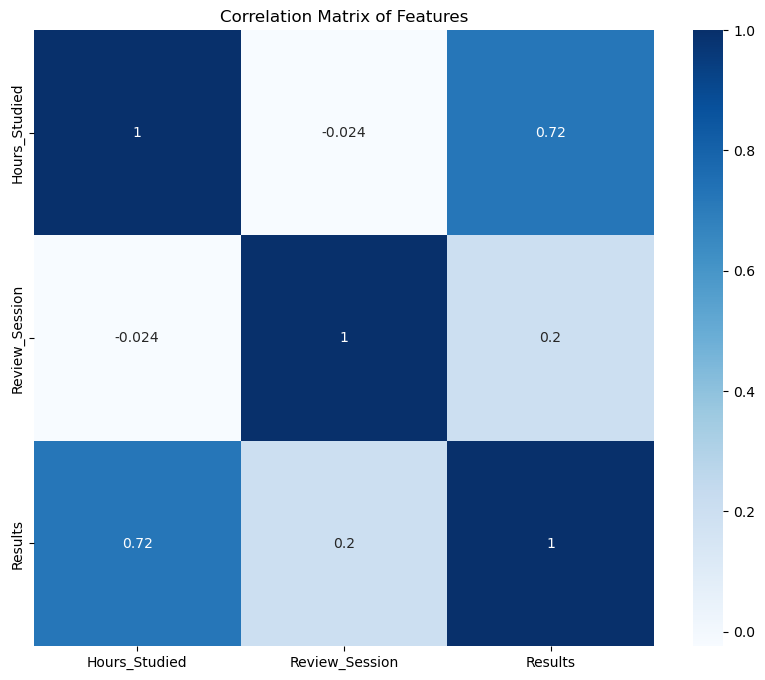

In [67]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix of Features')
plt.show()

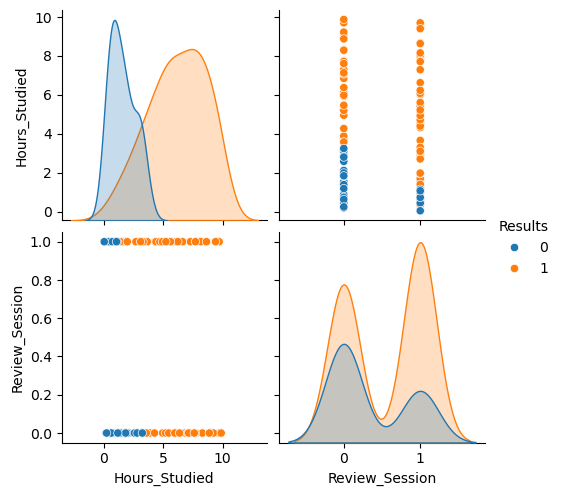

In [71]:
# Pairplot to visualize relationships (you can select specific columns if necessary)
sns.pairplot(data, hue='Results')
plt.show()

In [75]:
# Step 2: Prepare data for modeling
# Assuming the target variable is named 'target'
X = data.drop('Results', axis=1)
y = data['Results']

In [77]:
# Step 3: Fit a Logistic Regression model using the entire dataset
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

LogisticRegression(max_iter=1000)

In [79]:
# Step 4: Predict and evaluate the model on the entire dataset (train and test on the same data)
y_pred = logreg.predict(X)
y_pred_prob = logreg.predict_proba(X)[:, 1]  # Probability scores for ROC AUC


In [81]:
# Model Coefficients
print("Model Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Model Coefficients: [[1.36542016 1.87797591]]
Intercept: [-4.61373892]


In [83]:
# Performance Metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')


Accuracy: 0.9300
AUC: 0.9761


In [85]:
# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[30  2]
 [ 5 63]]


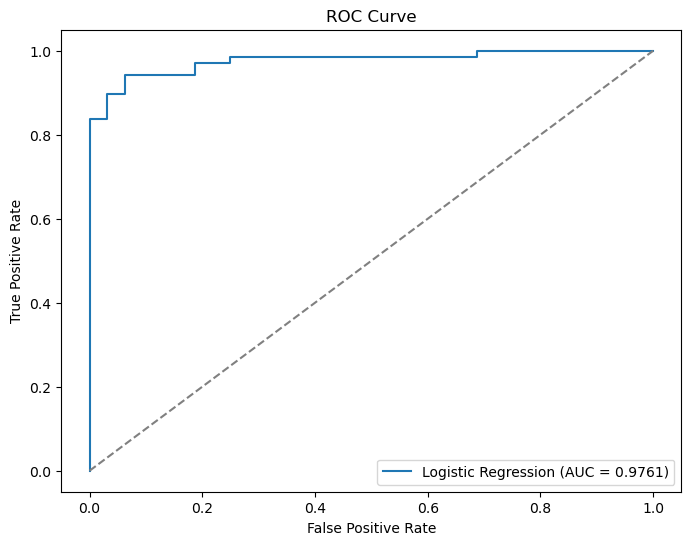

In [87]:
# Step 5: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation

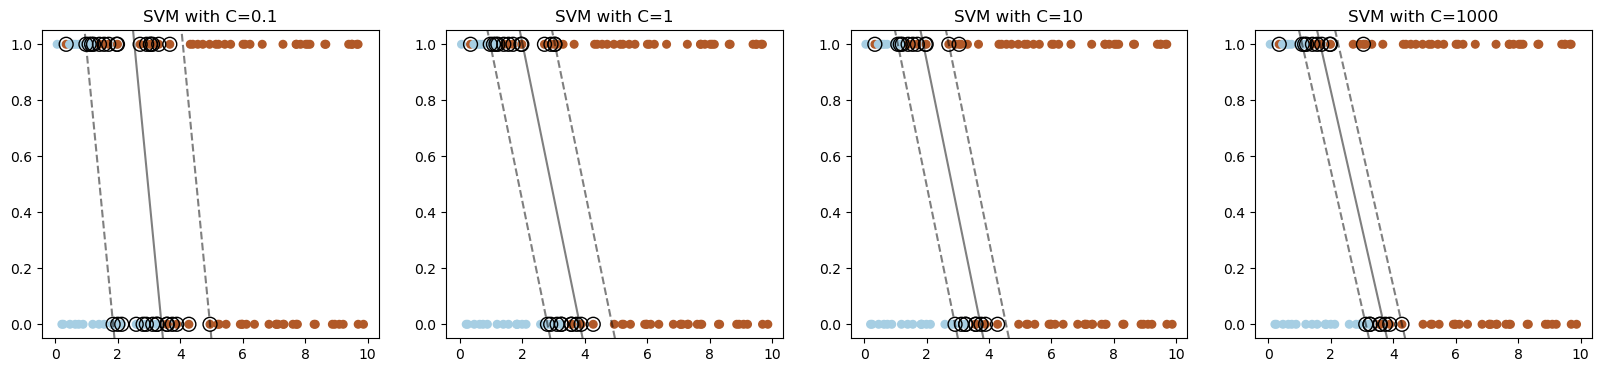

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv('./student_data.csv')

# Separate features (X) and target (y)
X = data[['Hours_Studied', 'Review_Session']].values  # Convert to NumPy array
y = data['Results'].values  # Convert to NumPy array

# Define the function to plot decision boundaries, margins, and support vectors
def plot_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    return ax

# Train SVMs with different C values
C_values = [0.1, 1, 10, 1000]
models = [SVC(kernel='linear', C=C).fit(X, y) for C in C_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, C in zip(models, axes, C_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # Plot the decision function (boundary and margins)
    ax = plot_decision_function(model, ax)
    
    ax.set_title(f'SVM with C={C}')

plt.show()


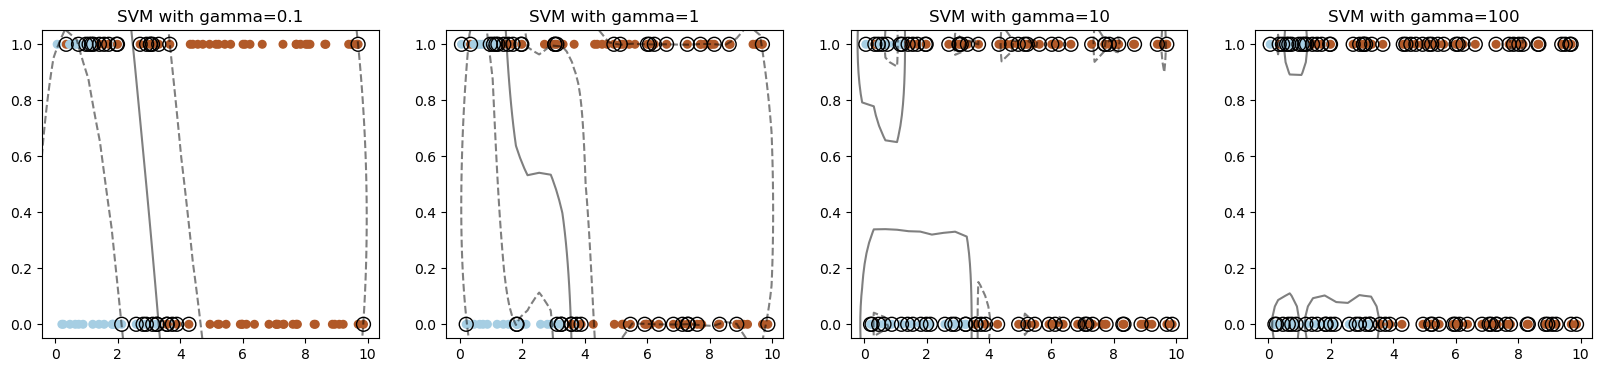

In [215]:

# Separate features (X) and target (y)
X = data[['Hours_Studied', 'Review_Session']].values  # Convert to NumPy array
y = data['Results'].values  # Convert to NumPy array

gamma_values = [0.1, 1, 10, 100]
models = [SVC(kernel='rbf', gamma=gamma).fit(X, y) for gamma in gamma_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for model, ax, gamma in zip(models, axes, gamma_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    # plot the decision function
    ax = plot_decision_function(model, ax)
    
    ax.set_title(f'SVM with gamma={gamma}')

plt.show()

RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation.

Best Parameters from Grid Search: {'C': 1, 'gamma': 0.1}
RBF SVM Accuracy with Best Gamma: 0.9300
Classification Report for RBF Kernel SVM:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.97      0.93      0.95        68

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100

Cross-Validation Scores for Best RBF Model: [0.9  0.9  0.95 0.9  1.  ]
Mean CV Accuracy: 0.9300


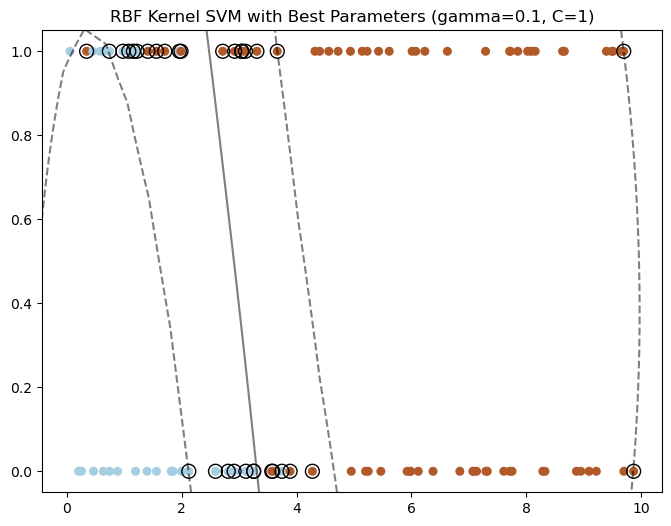

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('./student_data.csv')

# Separate features (X) and target (y)
X = data[['Hours_Studied', 'Review_Session']].values  # Convert to NumPy array
y = data['Results'].values  # Convert to NumPy array

# Step 1: Define the SVM with RBF kernel
rbf_svm = SVC(kernel='rbf')

# Step 2: Set up the parameter grid for gamma and C
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100]
}

# Step 3: Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rbf_svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X, y)

# Step 4: Get the best parameters and fit the final model
print(f"Best Parameters from Grid Search: {grid_search.best_params_}")

# Use the best parameters to train the final SVM model
best_rbf_svm = grid_search.best_estimator_

# Make predictions using the best RBF kernel model
y_pred_rbf = best_rbf_svm.predict(X)

# Evaluate the RBF kernel model
accuracy_rbf = accuracy_score(y, y_pred_rbf)
print(f"RBF SVM Accuracy with Best Gamma: {accuracy_rbf:.4f}")

# Print classification report
print("Classification Report for RBF Kernel SVM:")
print(classification_report(y, y_pred_rbf))

# Perform cross-validation on the best RBF model to see how it performs
cv_scores = cross_val_score(best_rbf_svm, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Best RBF Model: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# Plot the decision boundary for the best RBF model
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plot_decision_function(best_rbf_svm, ax)
ax.set_title(f'RBF Kernel SVM with Best Parameters (gamma={grid_search.best_params_["gamma"]}, C={grid_search.best_params_["C"]})')
plt.show()
